## Í≥ºÏ†ú 1: Ïû•Î•¥Î≥Ñ ÏòÅÌôî Ìä∏Î†åÎìú Î∞è Ìù•Ìñâ ÏÑ±Í≥µ ÏöîÏù∏ Î∂ÑÏÑù
ÏµúÍ∑º 20ÎÖÑÍ∞Ñ ÏòÅÌôî Ïû•Î•¥Î≥Ñ Ìä∏Î†åÎìú Î≥ÄÌôîÎ•º Î∂ÑÏÑùÌïòÍ≥†, Í∞Å Ïû•Î•¥ÏóêÏÑú Ìù•ÌñâÏóê ÏÑ±Í≥µÌïú ÏòÅÌôîÎì§Ïùò Í≥µÌÜµ ÏöîÏÜå(ÏòàÏÇ∞, Îü∞ÌÉÄÏûÑ, Ï∂úÏó∞ÏßÑ, Í∞úÎ¥â ÏãúÍ∏∞ Îì±)Î•º ÌååÏïÖÌïòÏÑ∏Ïöî.

In [ ]:
import pandas as pd
from IPython.display import display
import warnings
import ast 

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú ÏÑ§Ï†ï
warnings.filterwarnings('ignore', category=UserWarning)

# ÌååÏùº Í≤ΩÎ°ú
file_path = 'data_processed/kobis_with_credits_ko_genres_exploded.csv'

try:
    df = pd.read_csv(file_path)

    # üö® 'genres' Ïª¨ÎüºÏùò Î¨∏ÏûêÏó¥ÏùÑ Ïã§Ï†ú Î¶¨Ïä§Ìä∏ Í∞ùÏ≤¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # üö® 'genres' Ïª¨ÎüºÏùÑ explodeÌïòÏó¨ Í∞Å Ïû•Î•¥Î•º Í∞úÎ≥Ñ ÌñâÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
    df = df.explode('genres')

    # 1. 2005ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year
    recent_df = df[df['release_year'] >= 2005].copy()
    
    # 2. release_dateÏóêÏÑú Ïõî(month) Ï∂îÏ∂ú
    recent_df['release_month'] = pd.to_datetime(recent_df['release_date']).dt.month

    # 3. Ïû•Î•¥Î≥Ñ ÏàòÏùµ ÏÉÅÏúÑ 25% ÏòÅÌôî Ï∂îÏ∂ú
    def get_successful_movies(group):
        q3_revenue = group['revenue'].quantile(0.75)
        # üö® Ïó¨Í∏∞ÏÑú Í∞Å Í∑∏Î£π(Ïû•Î•¥) ÎÇ¥ÏóêÏÑú ÏòÅÌôî Ï†úÎ™©ÏúºÎ°ú Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
        group_no_duplicates = group.drop_duplicates(subset=['title'])
        return group_no_duplicates[group_no_duplicates['revenue'] >= q3_revenue]

    successful_movies_df = recent_df.groupby('genres').apply(get_successful_movies).reset_index(drop=True)

    # 4. Í∞Å Ïû•Î•¥Î≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ displayÎ°ú Ï∂úÎ†•
    grouped_by_genre = successful_movies_df.groupby('genres')

    print("--- Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏÑ±Í≥µ ÏòÅÌôî Î™©Î°ù (ÏÉÅÏúÑ 5Í∞ú) ---")

    for genre, group_df in grouped_by_genre:
        print(f"\n‚úÖ Ïû•Î•¥: {genre}")
        # üö® display Ï†ÑÏóê Îã§Ïãú ÌïúÎ≤à Ï§ëÎ≥µ Ï†úÍ±∞ (get_successful_movies Ìï®ÏàòÏóê Ïù¥ÎØ∏ Ï†ÅÏö©Îê®)
        # displayÏóê Î≥¥Ïó¨Ï§Ñ ÎïåÎßå `head(5)`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
        display(group_df[['title', 'revenue', 'audience_total', 'runtime', 'cast_names_ko', 'release_month']].head())
    
except FileNotFoundError:
    print(f"\nÏò§Î•ò: '{file_path}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except KeyError as e:
    print(f"\nÏò§Î•ò: {e} Ïª¨ÎüºÏù¥ DataFrameÏóê ÏóÜÏäµÎãàÎã§. Ïª¨ÎüºÎ™ÖÏùÑ Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

--- Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏÑ±Í≥µ ÏòÅÌôî Î™©Î°ù (ÏÉÅÏúÑ 5Í∞ú) ---

‚úÖ Ïû•Î•¥: SF


title       revenue  audience_total  runtime  \
0    Í¥¥Î¨º  6.656903e+10      10892305.0    119.0   
1   7Í¥ëÍµ¨  1.926371e+10       2225436.0    101.0   
2   Ïó∞Í∞ÄÏãú  3.206548e+10       4499856.0    109.0   
3  ÏÑ§Íµ≠Ïó¥Ï∞®  6.681845e+10       9321959.0    125.0   

                    cast_names_ko  release_month  
0             ÏÜ°Í∞ïÌò∏|Î≥ÄÌù¨Î¥â|Î∞ïÌï¥Ïùº|Î∞∞ÎëêÎÇò|Í≥†ÏïÑÏÑ±              7  
1             ÌïòÏßÄÏõê|Î∞ïÏ≤†ÎØº|Ïù¥ÌïúÏúÑ|Ïò§ÏßÄÌò∏|ÏÜ°ÏÉàÎ≤Ω              8  
2             ÍπÄÎ™ÖÎØº|Î¨∏Ï†ïÌù¨|ÍπÄÎèôÏôÑ|Ïù¥ÌïòÎä¨|Í∞ïÏã†Ïùº              7  
3  ÌÅ¨Î¶¨Ïä§ ÏóêÎ∞òÏä§|ÏÜ°Í∞ïÌò∏|ÏóêÎìú Ìï¥Î¶¨Ïä§|Ï°¥ ÌóàÌä∏|Ìã∏Îã§ Ïä§ÏúàÌäº              8


‚úÖ Ïû•Î•¥: Í∞ÄÏ°±


title       revenue  audience_total  runtime           cast_names_ko  \
4  Îß®Î∞úÏùò Í∏∞Î¥âÏù¥  1.214021e+10       1988117.0    100.0     Ïã†ÌòÑÏ§Ä|ÏûÑÌïòÎ£°|ÌÉÅÏû¨Ìõà|ÍπÄÏàòÎØ∏|ÍπÄÌö®ÏßÑ   
5       Í¥¥Î¨º  6.656903e+10      10892305.0    119.0     ÏÜ°Í∞ïÌò∏|Î≥ÄÌù¨Î¥â|Î∞ïÌï¥Ïùº|Î∞∞ÎëêÎÇò|Í≥†ÏïÑÏÑ±   
6    ÎßàÏù¥ ÌååÎçî  5.330582e+09        834630.0    105.0  ÍπÄÏòÅÏ≤†|Îã§ÎãàÏóò Ìó§Îãà|ÍπÄÏù∏Í∂å|Ïù¥Í±¥Î¨∏|ÏïàÏÑùÌôò   
7     ÏπúÏ†ïÏóÑÎßà  3.221876e+09        454746.0    108.0     ÍπÄÌï¥Ïàô|Î∞ïÏßÑÌù¨|Ï†ïÌòÑÏ£º|Ï°∞ÏòÅÏßÑ|Î∞ïÏ§ÄÌò∏   
8       ÌååÌåå  3.864042e+09        566746.0    116.0     Î∞ïÏö©Ïö∞|Í≥†ÏïÑÎùº|ÏÜêÎ≥ëÌò∏|Ï†ïÎ™ÖÏàô|ÏµúÍ≤ΩÏÑ†   

   release_month  
4              4  
5              7  
6              9  
7              4  
8              2


‚úÖ Ïû•Î•¥: Í≥µÏó∞


title       revenue  audience_total  runtime  \
12               Îü¨Î∏å Ïú†Ïñ¥ÏÖÄÌîÑ Ïù∏ ÏÑúÏö∏  3.209683e+09        342366.0    111.0   
13  Í∑∏ÎåÄ, Í≥†ÎßôÏÜå : ÍπÄÌò∏Ï§ë ÏÉùÏï† Ï≤´ Ìå¨ÎØ∏ÌåÖ Î¨¥ÎπÑ  2.909954e+09         94361.0     80.0   
14               ÏïÑÏûÑ ÌûàÏñ¥Î°ú Îçî ÌååÏù¥ÎÑê  5.563727e+09        230181.0    102.0   
15          ÏïÑÏù¥Ïú† ÏΩòÏÑúÌä∏ : Îçî Í≥®Îì† ÏïÑÏõå  1.573554e+09         66926.0    170.0   
16          ÏûÑÏòÅÏõÖ‚îÇÏïÑÏûÑ ÌûàÏñ¥Î°ú Îçî Ïä§ÌÉÄÎîîÏõÄ  9.801282e+09        346289.0    108.0   

          cast_names_ko  release_month  
12  ÍπÄÎÇ®Ï§Ä|ÍπÄÏÑùÏßÑ|ÎØºÏú§Í∏∞|Ï†ïÌò∏ÏÑù|Î∞ïÏßÄÎØº              1  
13                  ÍπÄÌò∏Ï§ë              9  
14                  ÏûÑÏòÅÏõÖ              3  
15                  Ïù¥ÏßÄÏùÄ              9  
16                  ÏûÑÏòÅÏõÖ              8


‚úÖ Ïû•Î•¥: Í≥µÌè¨(Ìò∏Îü¨)


title       revenue  audience_total  runtime        cast_names_ko  \
18      Í∑πÎùΩÎèÑ ÏÇ¥Ïù∏ÏÇ¨Í±¥  1.329444e+10       2074312.0    112.0  Î∞ïÌï¥Ïùº|Î∞ïÏÜîÎØ∏|ÏÑ±ÏßÄÎ£®|ÍπÄÍ¥ëÏàò|Ïú†ÌòúÏ†ï   
19          Í≤ÄÏùÄ Ïßë  8.806455e+09       1316488.0    103.0   Ìô©Ï†ïÎØº|Ïú†ÏÑ†|Í∞ïÏã†Ïùº|ÍπÄÌòúÏ†ï|Ïú†ÏäπÎ™©   
20  Í≥†Ê≠ª : ÌîºÏùò Ï§ëÍ∞ÑÍ≥†ÏÇ¨  1.027012e+10       1629264.0     85.0   Ïù¥Î≤îÏàò|ÎÇ®Í∑úÎ¶¨|ÍπÄÎ≤î|Ïú§Ï†ïÌù¨|Í∂åÌòÑÏÉÅ   
21            Î∞ïÏ•ê  1.479721e+10       2199378.0    133.0  ÏÜ°Í∞ïÌò∏|ÍπÄÏò•Îπà|Ïã†ÌïòÍ∑†|ÍπÄÌï¥Ïàô|ÏÜ°ÏòÅÏ∞Ω   
22        Ïò§ÏãπÌïú Ïó∞Ïï†  2.159157e+10       2952858.0    114.0  ÏÜêÏòàÏßÑ|Ïù¥ÎØºÍ∏∞|Ïã†ÎèôÌõà|Ï°∞ÏïÑÎùº|Ïù¥ÌòÑÏßÑ   

    release_month  
18              4  
19              6  
20              8  
21              4  
22             12


‚úÖ Ïû•Î•¥: Í∏∞ÌÉÄ


title       revenue  audience_total  runtime        cast_names_ko  \
31  Îçî ÌÖåÎü¨ ÎùºÏù¥Î∏å  3.984740e+10       5580701.0     97.0  ÌïòÏ†ïÏö∞|Ïù¥Í≤ΩÏòÅ|Ï†ÑÌòúÏßÑ|Ïù¥Îã§Ïúó|ÍπÄÌôçÌåå   

    release_month  
31              7


‚úÖ Ïû•Î•¥: Îã§ÌÅêÎ©òÌÑ∞Î¶¨


title       revenue  audience_total  runtime  \
32             ÏõåÎÇ≠ÏÜåÎ¶¨  1.865210e+10       2845331.0     77.0   
33          Ïö∏ÏßÄÎßà, ÌÜ§Ï¶à  2.108957e+09        367683.0     91.0   
34  ÎãòÏïÑ, Í∑∏ Í∞ïÏùÑ Í±¥ÎÑàÏßÄ ÎßàÏò§  3.697134e+10       4746458.0     85.0   
35           ÎÖ∏Î¨¥ÌòÑÏûÖÎãàÎã§  1.447037e+10       1842323.0    109.0   
36             Í≥µÎ≤îÏûêÎì§  1.634900e+09        206599.0    105.0   

          cast_names_ko  release_month  
32  ÏµúÏõêÍ∑†|Ïù¥ÏÇºÏàú|ÍπÄÎØºÏûê|ÏµúÏ¢ÖÎßå|ÏµúÏ¢ÖÎØº              1  
33                  Ïù¥Í∏àÌù¨              9  
34              Ï°∞Î≥ëÎßå|Í∞ïÍ≥ÑÏó¥             11  
35              ÎÖ∏Î¨¥ÌòÑ|Ïù¥ÏÉÅÌò∏              5  
36      Ïù¥Î™ÖÎ∞ï|ÍπÄÏû¨Ï≤†|ÍπÄÏû•Í≤∏|Í≥†ÎåÄÏòÅ              8


‚úÖ Ïû•Î•¥: ÎìúÎùºÎßà


title       revenue  audience_total  runtime        cast_names_ko  \
44    Í≥µÍ≥µÏùò Ï†Å 2  2.002252e+10       3123600.0    149.0   ÏÑ§Í≤ΩÍµ¨|Ï†ïÏ§ÄÌò∏|Ïú†Ìï¥ÏßÑ|Í∞ïÍ≤ΩÎçï|Î∞ïÏõÖ   
45        ÎßêÏïÑÌÜ§  2.603461e+10       4155296.0    117.0  Ï°∞ÏäπÏö∞|ÍπÄÎØ∏Ïàô|Ïù¥Í∏∞ÏòÅ|Î∞±ÏÑ±ÌòÑ|ÏïàÎÇ¥ÏÉÅ   
46  Î∞ïÏàòÏπ† Îïå Îñ†ÎÇòÎùº  1.311863e+10       2063656.0    115.0  Ï∞®ÏäπÏõê|Ïã†ÌïòÍ∑†|ÍπÄÏßÄÏàò|Î∞ïÏ†ïÏïÑ|Ï°∞Ï†ïÏßÑ   
47   Ïõ∞Ïª¥ Ìà¨ ÎèôÎßâÍ≥®  4.018094e+10       6413223.0    133.0   Ïã†ÌïòÍ∑†|Ï†ïÏû¨ÏòÅ|Í∞ïÌòúÏ†ï|Î¶¨ÎØº|Î•òÎçïÌôò   
48      ÏôïÏùò ÎÇ®Ïûê  6.586641e+10      10489308.0    119.0  Í∞êÏö∞ÏÑ±|Ïù¥Ï§ÄÍ∏∞|Ïú†Ìï¥ÏßÑ|Ï†ïÏßÑÏòÅ|Í∞ïÏÑ±Ïó∞   

    release_month  
44              1  
45              1  
46              8  
47              8  
48             12


‚úÖ Ïû•Î•¥: Î©úÎ°ú/Î°úÎß®Ïä§


title       revenue  audience_total  runtime  \
181            Ïó∞Ïï†Ïùò Î™©Ï†Å  9.639268e+09       1493211.0    121.0   
182           ÎÑàÎäî ÎÇ¥ Ïö¥Î™Ö  1.738289e+10       2659825.0    121.0   
183  ÎÇ¥ ÏÉùÏï† Í∞ÄÏû• ÏïÑÎ¶ÑÎã§Ïö¥ ÏùºÏ£ºÏùº  1.457610e+10       2269939.0    129.0   
184               Íµ¨ÏÑ∏Ï£º  1.003218e+10       1612280.0    104.0   
185              Ï≤≠Ï∂òÎßåÌôî  9.671450e+09       1549089.0    116.0   

            cast_names_ko  release_month  
181  Í∞ïÌòúÏ†ï|Î∞ïÌï¥Ïùº|Ïù¥ÏùÄÏàô|Ïù¥ÎåÄÏó∞|Î∞ïÍ∑∏Î¶¨ÎÇò              6  
182   Ï†ÑÎèÑÏó∞|Ìô©Ï†ïÎØº|ÎÇòÎ¨∏Ìù¨|ÏÑúÏ£ºÌù¨|Ïú§Ï†úÎ¨∏              9  
183   Ìô©Ï†ïÎØº|ÏóÑÏ†ïÌôî|ÍπÄÏú†Ï†ï|ÍπÄÏú§ÏÑù|ÏßÑÌÉúÌòÑ             10  
184    ÏµúÏÑ±Íµ≠|Ïã†Ïù¥|ÍπÄÏàòÎØ∏|Î∞ïÏ§ÄÍ∑ú|Ïù¥ÏÉÅÌòÑ              2  
185   Í∂åÏÉÅÏö∞|ÍπÄÌïòÎäò|Ïù¥ÏÉÅÏö∞|Í∞ïÍ∏∞Ìôî|Ïù¥ÏòÅÏ≤†              3


‚úÖ Ïû•Î•¥: ÎÆ§ÏßÄÏª¨


title       revenue  audience_total  runtime        cast_names_ko  \
224      Í∞ÄÎ£®ÏßÄÍ∏∞  1.620189e+09        245857.0    120.0  Î¥âÌÉúÍ∑ú|ÍπÄÏòàÏõê|Î∞ïÏòÅÏÑú|ÍπÄÏòÅÏï†|Ïò§Îã¨Ïàò   
225  Ïù∏ÏÉùÏùÄ ÏïÑÎ¶ÑÎã§Ïõå  1.079399e+10       1158887.0    122.0  Î•òÏäπÎ£°|ÏóºÏ†ïÏïÑ|Î∞ïÏÑ∏ÏôÑ|ÏòπÏÑ±Ïö∞|Ïã¨Îã¨Í∏∞   
226        ÏòÅÏõÖ  3.191558e+10       3230573.0    120.0  Ï†ïÏÑ±Ìôî|ÍπÄÍ≥†ÏùÄ|ÎÇòÎ¨∏Ìù¨|Ï°∞Ïû¨Ïú§|Î∞∞Ï†ïÎÇ®   

     release_month  
224              4  
225              9  
226             12


‚úÖ Ïû•Î•¥: ÎØ∏Ïä§ÌÑ∞Î¶¨


title       revenue  audience_total  runtime        cast_names_ko  \
227  Î∞ïÏàòÏπ† Îïå Îñ†ÎÇòÎùº  1.311863e+10       2063656.0    115.0  Ï∞®ÏäπÏõê|Ïã†ÌïòÍ∑†|ÍπÄÏßÄÏàò|Î∞ïÏ†ïÏïÑ|Ï°∞Ï†ïÏßÑ   
228   Í∑πÎùΩÎèÑ ÏÇ¥Ïù∏ÏÇ¨Í±¥  1.329444e+10       2074312.0    112.0  Î∞ïÌï¥Ïùº|Î∞ïÏÜîÎØ∏|ÏÑ±ÏßÄÎ£®|ÍπÄÍ¥ëÏàò|Ïú†ÌòúÏ†ï   
229         Í∂ÅÎÖÄ  8.909668e+09       1339015.0    118.0  Î∞ïÏßÑÌù¨|Ïú§ÏÑ∏ÏïÑ|Î•òÏ†ïÏïÑ|ÏûÑÏ†ïÏùÄ|ÏÑúÏòÅÌù¨   
230     Í∑∏Î¶ºÏûê ÏÇ¥Ïù∏  1.244203e+10       1859624.0    111.0  Ìô©Ï†ïÎØº|Î•òÎçïÌôò|Ïò§Îã¨Ïàò|ÏóÑÏßÄÏõê|Î∞ïÏßÑÏö∞   
231         ÌôîÏ∞®  1.832749e+10       2418592.0    117.0  Ïù¥ÏÑ†Í∑†|ÍπÄÎØºÌù¨|Ï°∞ÏÑ±Ìïò|ÏÜ°ÌïòÏú§|Ï∞®ÏàòÏó∞   

     release_month  
227              8  
228              4  
229             10  
230              4  
231              3


‚úÖ Ïû•Î•¥: Î≤îÏ£Ñ


title       revenue  audience_total  runtime  \
246                 Ï∂îÍ≤©Ïûê  3.389918e+10       5033022.0    123.0   
247              7Í∏â Í≥µÎ¨¥Ïõê  2.617418e+10       4002500.0    112.0   
248             Í±∞Î∂ÅÏù¥ Îã¨Î¶∞Îã§  2.057350e+10       3017903.0    117.0   
249                Î∂ÄÎãπÍ±∞Îûò  2.096473e+10       2718611.0    119.0   
250  Î≤îÏ£ÑÏôÄÏùò Ï†ÑÏüÅ: ÎÇòÏÅúÎÜàÎì§ Ï†ÑÏÑ±ÏãúÎåÄ  3.625847e+10       4682529.0    133.0   

           cast_names_ko  release_month  
246  ÍπÄÏú§ÏÑù|ÌïòÏ†ïÏö∞|ÏÑúÏòÅÌù¨|Î∞ïÌö®Ï£º|ÍπÄÏú†Ï†ï              2  
247  ÍπÄÌïòÎäò|Í∞ïÏßÄÌôò|ÏûÑÏÑ±ÌòÑ|Ïú†ÏäπÎ™©|Í∞ïÍ∑úÏòÅ              4  
248  ÍπÄÏú§ÏÑù|Ï†ïÍ≤ΩÌò∏|Í≤¨ÎØ∏Î¶¨|ÏÑ†Ïö∞ÏÑ†|ÏµúÏàòÌòÑ              6  
249  Ìô©Ï†ïÎØº|Î•òÏäπÎ≤î|Ï≤úÌò∏ÏßÑ|ÍπÄÏäπÌõà|Ïú†Ìï¥ÏßÑ             10  
250  ÏµúÎØºÏãù|ÌïòÏ†ïÏö∞|Ï°∞ÏßÑÏõÖ|ÎßàÎèôÏÑù|Í≥ΩÎèÑÏõê              2


‚úÖ Ïû•Î•¥: ÏÇ¨Í∑π


title       revenue  audience_total  runtime        cast_names_ko  \
281       ÏµúÏ¢ÖÎ≥ëÍ∏∞ Ìôú  5.578002e+10       7463056.0    122.0  Î∞ïÌï¥Ïùº|Î•òÏäπÎ£°|ÍπÄÎ¨¥Ïó¥|Î¨∏Ï±ÑÏõê|Ïù¥ÌïúÏúÑ   
282  Î∞îÎûåÍ≥º Ìï®Íªò ÏÇ¨ÎùºÏßÄÎã§  3.454249e+10       4898495.0    121.0  Ï∞®ÌÉúÌòÑ|Ïò§ÏßÄÌò∏|ÎØºÌö®Î¶∞|ÏÑ±ÎèôÏùº|Í≥†Ï∞ΩÏÑù   
283  Í¥ëÌï¥, ÏôïÏù¥ Îêú ÎÇ®Ïûê  8.862082e+10      12274154.0    131.0   Ïù¥Î≥ëÌóå|Î•òÏäπÎ£°|ÌïúÌö®Ï£º|Ïû•Í¥ë|ÍπÄÏù∏Í∂å   
284           Í¥ÄÏÉÅ  6.591471e+10       9121108.0    139.0  ÏÜ°Í∞ïÌò∏|Ïù¥Ï†ïÏû¨|Î∞±Ïú§Ïãù|Ï°∞Ï†ïÏÑù|Ïù¥Ï¢ÖÏÑù   
285   Íµ∞ÎèÑ: ÎØºÎûÄÏùò ÏãúÎåÄ  3.674397e+10       4741281.0    137.0  ÌïòÏ†ïÏö∞|Í∞ïÎèôÏõê|Ï°∞ÏßÑÏõÖ|ÎßàÎèôÏÑù|Ï†ïÎßåÏãù   

     release_month  
281              8  
282              8  
283              9  
284              9  
285              7


‚úÖ Ïû•Î•¥: ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥)


title       revenue  audience_total  runtime  \
293  Ï¢ãÏùÄ ÎÜà, ÎÇòÏÅú ÎÜà, Ïù¥ÏÉÅÌïú ÎÜà  4.369137e+10       6676132.0    139.0   

           cast_names_ko  release_month  
293  ÏÜ°Í∞ïÌò∏|Ïù¥Î≥ëÌóå|Ï†ïÏö∞ÏÑ±|ÏóÑÏßÄÏõê|Ïò§ÏùºÏö©              7


‚úÖ Ïû•Î•¥: Ïä§Î¶¥Îü¨


title       revenue  audience_total  runtime        cast_names_ko  \
294     ÏπúÏ†àÌïú Í∏àÏûêÏî®  2.021563e+10       3079279.0    112.0  Ïù¥ÏòÅÏï†|ÏµúÎØºÏãù|Í∂åÏòàÏòÅ|ÍπÄÏãúÌõÑ|ÎÇ®ÏùºÏö∞   
295  Îã¨ÏΩ§, ÏÇ¥Î≤åÌïú Ïó∞Ïù∏  1.334609e+10       2065433.0    110.0  Î∞ïÏö©Ïö∞|ÏµúÍ∞ïÌù¨|Ïù¥Í¥ëÏö∞|Ï°∞ÏùÄÏßÄ|Ï†ïÍ≤ΩÌò∏   
296      Í∑∏ÎÜà Î™©ÏÜåÎ¶¨  1.724216e+10       2911117.0    122.0  ÏÑ§Í≤ΩÍµ¨|ÍπÄÎÇ®Ï£º|Í∞ïÎèôÏõê|ÍπÄÏòÅÏ≤†|ÏÜ°ÏòÅÏ∞Ω   
297    Í∑πÎùΩÎèÑ ÏÇ¥Ïù∏ÏÇ¨Í±¥  1.329444e+10       2074312.0    112.0  Î∞ïÌï¥Ïùº|Î∞ïÏÜîÎØ∏|ÏÑ±ÏßÄÎ£®|ÍπÄÍ¥ëÏàò|Ïú†ÌòúÏ†ï   
298      ÏÑ∏Î∏ê Îç∞Ïù¥Ï¶à  1.353440e+10       2020299.0    125.0  ÍπÄÏú§ÏßÑ|ÍπÄÎØ∏Ïàô|Î∞ïÌù¨Ïàú|ÏµúÎ¨¥ÏÑ±|Ïû•Ìï≠ÏÑ†   

     release_month  
294              7  
295              4  
296              2  
297              4  
298             11


‚úÖ Ïû•Î•¥: Ïï†ÎãàÎ©îÏù¥ÏÖò


title       revenue  audience_total  runtime  \
334              ÎßàÎãπÏùÑ ÎÇòÏò® ÏïîÌÉâ  1.343974e+10       2021416.0     93.0   
335          Ï†êÎ∞ïÏù¥:ÌïúÎ∞òÎèÑÏùò Í≥µÎ£°3D  8.978200e+09        967168.0     88.0   
336       ÎΩÄÎ°úÎ°ú Í∑πÏû•Ìåê ÏäàÌçºÏç∞Îß§ ÎåÄÎ™®Ìóò  6.368320e+09        867148.0     77.0   
337        ÎΩÄÎ°úÎ°ú Í∑πÏû•Ìåê Í≥µÎ£°ÏÑ¨ ÎåÄÎ™®Ìóò  6.140841e+09        812674.0     78.0   
338  Ïã†ÎπÑÏïÑÌååÌä∏: Í∏àÎπõ ÎèÑÍπ®ÎπÑÏôÄ ÎπÑÎ∞ÄÏùò ÎèôÍµ¥  4.925114e+09        667879.0     67.0   

           cast_names_ko  release_month  
334  Î¨∏ÏÜåÎ¶¨|Î∞ïÏ≤†ÎØº|ÏµúÎØºÏãù|Ïú†ÏäπÌò∏|ÍπÄÏÉÅÌòÑ              7  
335          Ïù¥ÌòïÏÑù|Ïã†Ïö©Ïö∞|Íµ¨ÏûêÌòï              1  
336   Ïù¥ÏÑ†|Ïù¥ÎØ∏Ïûê|ÍπÄÌôòÏßÑ|Ìï®ÏàòÏ†ï|ÌôçÏÜåÏòÅ              1  
337   Ïù¥ÏÑ†|Ïù¥ÎØ∏Ïûê|Ìï®ÏàòÏ†ï|ÌôçÏÜåÏòÅ|Ï†ïÎØ∏Ïàô             12  
338  Ï°∞ÌòÑÏ†ï|ÍπÄÏòÅÏùÄ|ÍπÄÏ±ÑÌïò|Ïã†Ïö©Ïö∞|Ïó¨ÎØºÏ†ï              7


‚úÖ Ïû•Î•¥: Ïï°ÏÖò


title       revenue  audience_total  runtime  \
352                 ÎîîÏõå  4.933355e+10       7854274.0     90.0   
353                Ï∂îÍ≤©Ïûê  3.389918e+10       5033022.0    123.0   
354     Í∞ïÏ≤†Ï§ë: Í≥µÍ≥µÏùò Ï†Å 1-1  2.862218e+10       4310578.0    127.0   
355  Ï¢ãÏùÄ ÎÜà, ÎÇòÏÅú ÎÜà, Ïù¥ÏÉÅÌïú ÎÜà  4.369137e+10       6676132.0    139.0   
356                Ïã†Í∏∞Ï†Ñ  2.422619e+10       3710813.0    134.0   

           cast_names_ko  release_month  
352       Î∏åÎ£©Ïä§ ÏïÑÎßåÎã§|Î≤†Ïñ¥ Ï†úÏù¥Ïä®              8  
353  ÍπÄÏú§ÏÑù|ÌïòÏ†ïÏö∞|ÏÑúÏòÅÌù¨|Î∞ïÌö®Ï£º|ÍπÄÏú†Ï†ï              2  
354  ÏÑ§Í≤ΩÍµ¨|Ï†ïÏû¨ÏòÅ|ÍπÄÏòÅÌïÑ|Í∞ïÏã†Ïùº|Ïú†Ìï¥ÏßÑ              6  
355  ÏÜ°Í∞ïÌò∏|Ïù¥Î≥ëÌóå|Ï†ïÏö∞ÏÑ±|ÏóÑÏßÄÏõê|Ïò§ÏùºÏö©              7  
356  Ï†ïÏû¨ÏòÅ|ÌïúÏùÄÏ†ï|ÌóàÏ§ÄÌò∏|ÏïàÏÑ±Í∏∞|ÍπÄÎ™ÖÏàò              9


‚úÖ Ïû•Î•¥: Ïñ¥ÎìúÎ≤§Ï≤ò


title       revenue  audience_total  runtime  \
408  Ï¢ãÏùÄ ÎÜà, ÎÇòÏÅú ÎÜà, Ïù¥ÏÉÅÌïú ÎÜà  4.369137e+10       6676132.0    139.0   
409                Ìï¥Ïö¥ÎåÄ  8.069220e+10      11276049.0    129.0   
410                 Í∞êÍ∏∞  2.171164e+10       3107800.0    121.0   
411       Ìï¥Ï†Å: Î∞îÎã§Î°ú Í∞Ñ ÏÇ∞Ï†Å  6.618997e+10       8625574.0    129.0   
412   Ï°∞ÏÑ†Î™ÖÌÉêÏ†ï : ÏÇ¨ÎùºÏßÑ ÎÜâÏùò Îî∏  3.017267e+10       3832898.0    124.0   

           cast_names_ko  release_month  
408  ÏÜ°Í∞ïÌò∏|Ïù¥Î≥ëÌóå|Ï†ïÏö∞ÏÑ±|ÏóÑÏßÄÏõê|Ïò§ÏùºÏö©              7  
409  ÏÑ§Í≤ΩÍµ¨|ÌïòÏßÄÏõê|Î∞ïÏ§ëÌõà|ÏóÑÏ†ïÌôî|Ïù¥ÎØºÍ∏∞              7  
410    Ïû•ÌòÅ|ÏàòÏï†|Î∞ïÎØºÌïò|ÎÇ®Î¨∏Ï≤†|Ïú†Ìï¥ÏßÑ              8  
411  ÍπÄÎÇ®Í∏∏|ÏÜêÏòàÏßÑ|Ïã†Ï†ïÍ∑º|Ïú†Ìï¥ÏßÑ|Ïù¥Í≤ΩÏòÅ              8  
412  ÍπÄÎ™ÖÎØº|Ïò§Îã¨Ïàò|Ïù¥Ïó∞Ìù¨|Ï°∞Í¥ÄÏö∞|Ï†ïÏõêÏ§ë              2


‚úÖ Ïû•Î•¥: Ï†ÑÏüÅ


title       revenue  audience_total  runtime          cast_names_ko  \
415  Ïõ∞Ïª¥ Ìà¨ ÎèôÎßâÍ≥®  4.018094e+10       6413223.0    133.0     Ïã†ÌïòÍ∑†|Ï†ïÏû¨ÏòÅ|Í∞ïÌòúÏ†ï|Î¶¨ÎØº|Î•òÎçïÌôò   
416       Ïã†Í∏∞Ï†Ñ  2.422619e+10       3710813.0    134.0    Ï†ïÏû¨ÏòÅ|ÌïúÏùÄÏ†ï|ÌóàÏ§ÄÌò∏|ÏïàÏÑ±Í∏∞|ÍπÄÎ™ÖÏàò   
417     Ìè¨ÌôîÏÜçÏúºÎ°ú  2.369803e+10       3307797.0    120.0    Ï∞®ÏäπÏõê|Í∂åÏÉÅÏö∞|ÏµúÏäπÌòÑ|ÍπÄÏäπÏö∞|Î¨∏Ïû¨Ïõê   
418    Ïù∏Ï≤úÏÉÅÎ•ôÏûëÏ†Ñ  5.499344e+10       7033357.0    110.0  Ïù¥Ï†ïÏû¨|Ïù¥Î≤îÏàò|Î¶¨Ïïî ÎãàÏä®|ÏßÑÏÑ∏Ïó∞|Ï†ïÏ§ÄÌò∏   

     release_month  
415              8  
416              9  
417              6  
418              7


‚úÖ Ïû•Î•¥: ÏΩîÎØ∏Îîî


title       revenue  audience_total  runtime        cast_names_ko  \
419        ÎßàÌååÎèÑ  1.663338e+10       2618070.0    107.0  ÍπÄÏàòÎØ∏|Ïó¨Ïö¥Í≥Ñ|Ïù¥Ï†ïÏßÑ|Ïù¥Î¨∏Ïãù|Ïò§Îã¨Ïàò   
420  Î∞ïÏàòÏπ† Îïå Îñ†ÎÇòÎùº  1.311863e+10       2063656.0    115.0  Ï∞®ÏäπÏõê|Ïã†ÌïòÍ∑†|ÍπÄÏßÄÏàò|Î∞ïÏ†ïÏïÑ|Ï°∞Ï†ïÏßÑ   
421     Í∞ÄÎ¨∏Ïùò ÏúÑÍ∏∞  2.848571e+10       4508292.0    115.0  Ïã†ÌòÑÏ§Ä|ÍπÄÏàòÎØ∏|ÍπÄÏõêÌù¨|Ï†ïÏ§ÄÌïò|ÏµúÏùÄÏ£º   
422  Í¥ëÏãùÏù¥ ÎèôÏÉù Í¥ëÌÉú  1.276858e+10       2018197.0    104.0  ÍπÄÏ£ºÌòÅ|Î¥âÌÉúÍ∑ú|Ïù¥ÏöîÏõê|ÍπÄÏïÑÏ§ë|Ï†ïÍ≤ΩÌò∏   
423      Ìà¨ÏÇ¨Î∂ÄÏùºÏ≤¥  3.147477e+10       4997745.0    125.0  Ï†ïÏ§ÄÌò∏|Ï†ïÏõÖÏù∏|ÍπÄÏÉÅÏ§ë|Î∞ïÏö©Ïãù|ÏµúÏú§ÏòÅ   

     release_month  
419              3  
420              8  
421              9  
422             11  
423              1


‚úÖ Ïû•Î•¥: ÌåêÌÉÄÏßÄ


title       revenue  audience_total  runtime        cast_names_ko  \
495         ÎîîÏõå  4.933355e+10       7854274.0     90.0       Î∏åÎ£©Ïä§ ÏïÑÎßåÎã§|Î≤†Ïñ¥ Ï†úÏù¥Ïä®   
496        Ï†ÑÏö∞Ïπò  4.378833e+10       6022722.0    136.0  Í∞ïÎèôÏõê|ÏûÑÏàòÏ†ï|ÍπÄÏú§ÏÑù|Ïú†Ìï¥ÏßÑ|ÍπÄÏãúÍ∂å   
497       ÎäëÎåÄÏÜåÎÖÑ  4.640984e+10       6627275.0    124.0  ÏÜ°Ï§ëÍ∏∞|Î∞ïÎ≥¥ÏòÅ|Ïû•ÏòÅÎÇ®|Ïú†Ïó∞ÏÑù|ÍπÄÌñ•Í∏∞   
498    Î∑∞Ìã∞ Ïù∏ÏÇ¨Ïù¥Îìú  1.604508e+10       2039642.0    126.0  ÌïúÌö®Ï£º|ÍπÄÎåÄÎ™Ö|ÎèÑÏßÄÌïú|Î∞∞ÏÑ±Ïö∞|Î∞ïÏã†Ìòú   
499  Ïã†Í≥ºÌï®Íªò-Ï£ÑÏôÄ Î≤å  1.156022e+11      14398110.0    139.0  ÌïòÏ†ïÏö∞|Ï∞®ÌÉúÌòÑ|Ï£ºÏßÄÌõà|ÍπÄÌñ•Í∏∞|ÍπÄÎèôÏö±   

     release_month  
495              8  
496             12  
497             10  
498              8  
499             12

In [1]:
import pandas as pd
from IPython.display import display
import ast

# ÌååÏùº Í≤ΩÎ°ú
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    df = pd.read_csv(PATH_EXP)
except FileNotFoundError:
    print(f"Ïò§Î•ò: '{PATH_EXP}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# üö® 'genres' Ïª¨ÎüºÏùò Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏ Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# üö® 'genres' Ïª¨ÎüºÏùÑ explodeÌïòÏó¨ Í∞Å Î¶¨Ïä§Ìä∏ ÏïÑÏù¥ÌÖúÏùÑ Í∞úÎ≥Ñ ÌñâÏúºÎ°ú Î∂ÑÎ¶¨
df_exploded = df.explode('genres')

# 1. 'genres' Ïª¨ÎüºÏúºÎ°ú Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Í≥ÑÏÇ∞
genre_counts_df = (df_exploded.groupby("genres")["movie_id"]
                   .nunique()
                   .sort_values(ascending=False)
                   .reset_index())

genre_counts_df.columns = ['Ïû•Î•¥', 'ÏòÅÌôî_Í∞úÏàò']

# 2. Í≤∞Í≥º Ï∂úÎ†•
print("--- Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ---")
display(genre_counts_df)

--- Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ---


Ïû•Î•¥  ÏòÅÌôî_Í∞úÏàò
0        ÎìúÎùºÎßà    565
1        ÏΩîÎØ∏Îîî    307
2         Ïï°ÏÖò    222
3     Î©úÎ°ú/Î°úÎß®Ïä§    175
4        Ïä§Î¶¥Îü¨    163
5         Î≤îÏ£Ñ    132
6      Ïï†ÎãàÎ©îÏù¥ÏÖò     77
7     Í≥µÌè¨(Ìò∏Îü¨)     74
8       ÎØ∏Ïä§ÌÑ∞Î¶¨     71
9         ÏÇ¨Í∑π     47
10     Îã§ÌÅêÎ©òÌÑ∞Î¶¨     46
11       ÌåêÌÉÄÏßÄ     33
12        Í∞ÄÏ°±     28
13        Í≥µÏó∞     25
14      Ïñ¥ÎìúÎ≤§Ï≤ò     21
15        Ï†ÑÏüÅ     16
16        SF     12
17        Í∏∞ÌÉÄ      6
18       ÎÆ§ÏßÄÏª¨      6
19  ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥)      1

In [ ]:
import pandas as pd
from IPython.display import display
import ast

# ÌååÏùº Í≤ΩÎ°ú
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    df = pd.read_csv(PATH_EXP)
except FileNotFoundError:
    print(f"Ïò§Î•ò: '{PATH_EXP}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# üö® Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò ÌõÑ explode
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.explode('genres')

# 1. 'genres' Ïª¨ÎüºÏúºÎ°ú Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Í≥ÑÏÇ∞
genre_counts_df = (df.groupby("genres")["movie_id"]
                   .nunique()
                   .sort_values(ascending=False)
                   .reset_index())

genre_counts_df.columns = ['Ïû•Î•¥', 'ÏòÅÌôî_Í∞úÏàò']

# 2. ÏòÅÌôî Í∞úÏàòÍ∞Ä 10Í∞ú Ï¥àÍ≥ºÏù∏ Ïû•Î•¥ÏôÄ Ïù¥ÌïòÏù∏ Ïû•Î•¥Î°ú Î∂ÑÎ¶¨
over_10 = genre_counts_df[genre_counts_df['ÏòÅÌôî_Í∞úÏàò'] > 10]
under_10 = genre_counts_df[genre_counts_df['ÏòÅÌôî_Í∞úÏàò'] <= 10]

# 3. 'Í∏∞ÌÉÄ' Ìï≠Î™© ÏÉùÏÑ± Î∞è Ìè¨Ìï®Îêú Ïû•Î•¥Î™Ö Ï∂îÍ∞Ä
other_count = under_10['ÏòÅÌôî_Í∞úÏàò'].sum()
other_genres = ', '.join(under_10['Ïû•Î•¥'])
other_row = pd.DataFrame([['Í∏∞ÌÉÄ (' + other_genres + ')', other_count]], columns=['Ïû•Î•¥', 'ÏòÅÌôî_Í∞úÏàò'])

# 4. Îëê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
final_counts_df = pd.concat([over_10, other_row], ignore_index=True)

print("--- Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (10Í∞ú Ïù¥Ìïò Ïû•Î•¥Í∞Ä 'Í∏∞ÌÉÄ'Î°ú ÌÜµÌï©) ---")
display(final_counts_df)

--- Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (10Í∞ú Ïù¥Ìïò Ïû•Î•¥Í∞Ä 'Í∏∞ÌÉÄ'Î°ú ÌÜµÌï©) ---


Ïû•Î•¥  ÏòÅÌôî_Í∞úÏàò
0                      ÎìúÎùºÎßà    565
1                      ÏΩîÎØ∏Îîî    307
2                       Ïï°ÏÖò    222
3                   Î©úÎ°ú/Î°úÎß®Ïä§    175
4                      Ïä§Î¶¥Îü¨    163
5                       Î≤îÏ£Ñ    132
6                    Ïï†ÎãàÎ©îÏù¥ÏÖò     77
7                   Í≥µÌè¨(Ìò∏Îü¨)     74
8                     ÎØ∏Ïä§ÌÑ∞Î¶¨     71
9                       ÏÇ¨Í∑π     47
10                   Îã§ÌÅêÎ©òÌÑ∞Î¶¨     46
11                     ÌåêÌÉÄÏßÄ     33
12                      Í∞ÄÏ°±     28
13                      Í≥µÏó∞     25
14                    Ïñ¥ÎìúÎ≤§Ï≤ò     21
15                      Ï†ÑÏüÅ     16
16                      SF     12
17  Í∏∞ÌÉÄ (Í∏∞ÌÉÄ, ÎÆ§ÏßÄÏª¨, ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥))     13

### **2005-2025 Ïû•Î•¥Î≥Ñ Í∞úÎ¥â Ìé∏Ïàò ÎπÑÏú® (Ìé∏ÏàòÍ∞Ä 10Í∞ú Ïù¥ÌïòÏù∏ ÏòÅÌôîÎì§ÏùÄ 'Í∏∞ÌÉÄ'Î°ú ÌÜµÌï©)**
**--> Í∏∞ÌÉÄ (Í∏∞ÌÉÄ, ÎÆ§ÏßÄÏª¨, ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥))**

### **Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏßÄÌëú ÎπÑÍµê(ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥)**
**--> ÌèâÍ∑† ÏàòÏùµ, ÌèâÍ∑† Í¥ÄÍ∞ùÏàò, ÌèâÍ∑† Îü∞ÌÉÄÏûÑ**

### **Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏòÅÌôîÏùò Í∞úÎ¥â Í≥ÑÏ†à Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî**

### **Ìù•Ìñâ ÏòÅÌôî Ïû•Î•¥ Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨**
**--> ÏïÑÏßÅ ÌèâÏ†ê Ï∂îÍ∞Ä Ïïà Ìï¥ÏÑú Î™ªÌñàÎåú**


--- Ïû•Î•¥Î≥Ñ Í∞úÎ¥â Ìé∏Ïàò ÌååÏù¥ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî ---


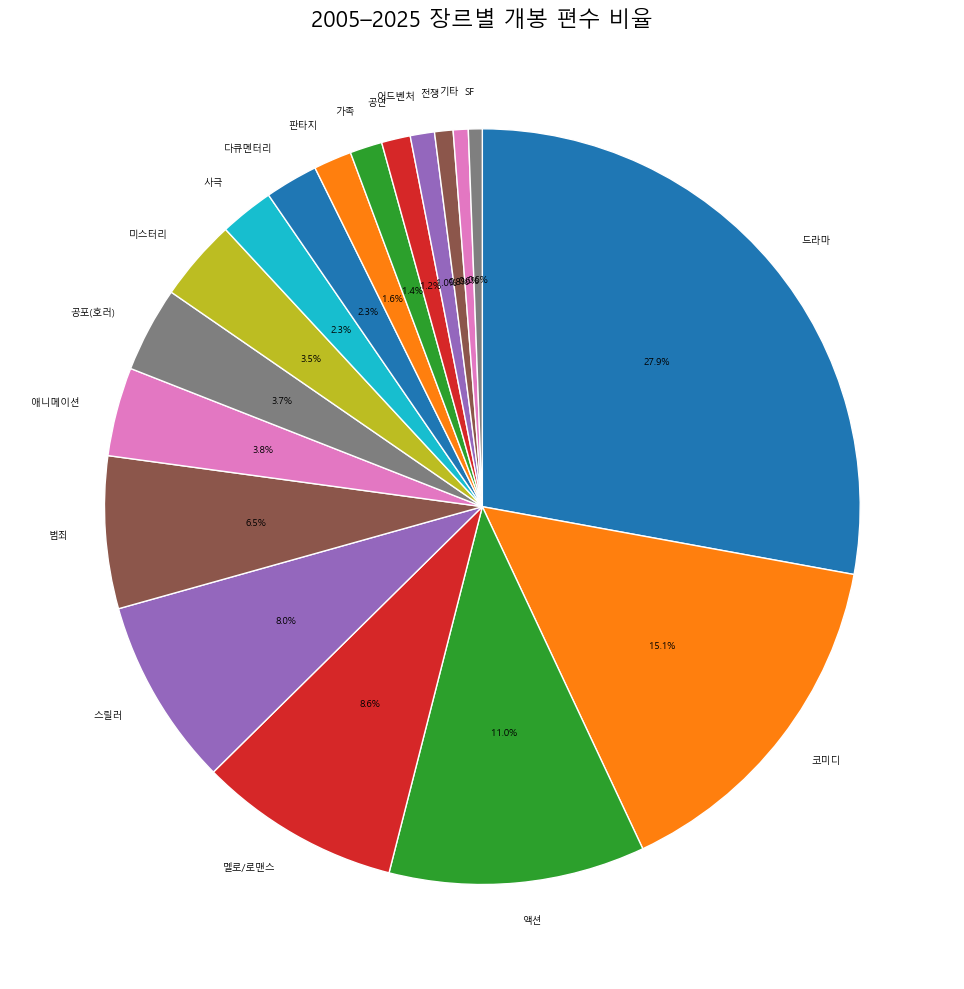


--- Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏßÄÌëú ÏãúÍ∞ÅÌôî ---


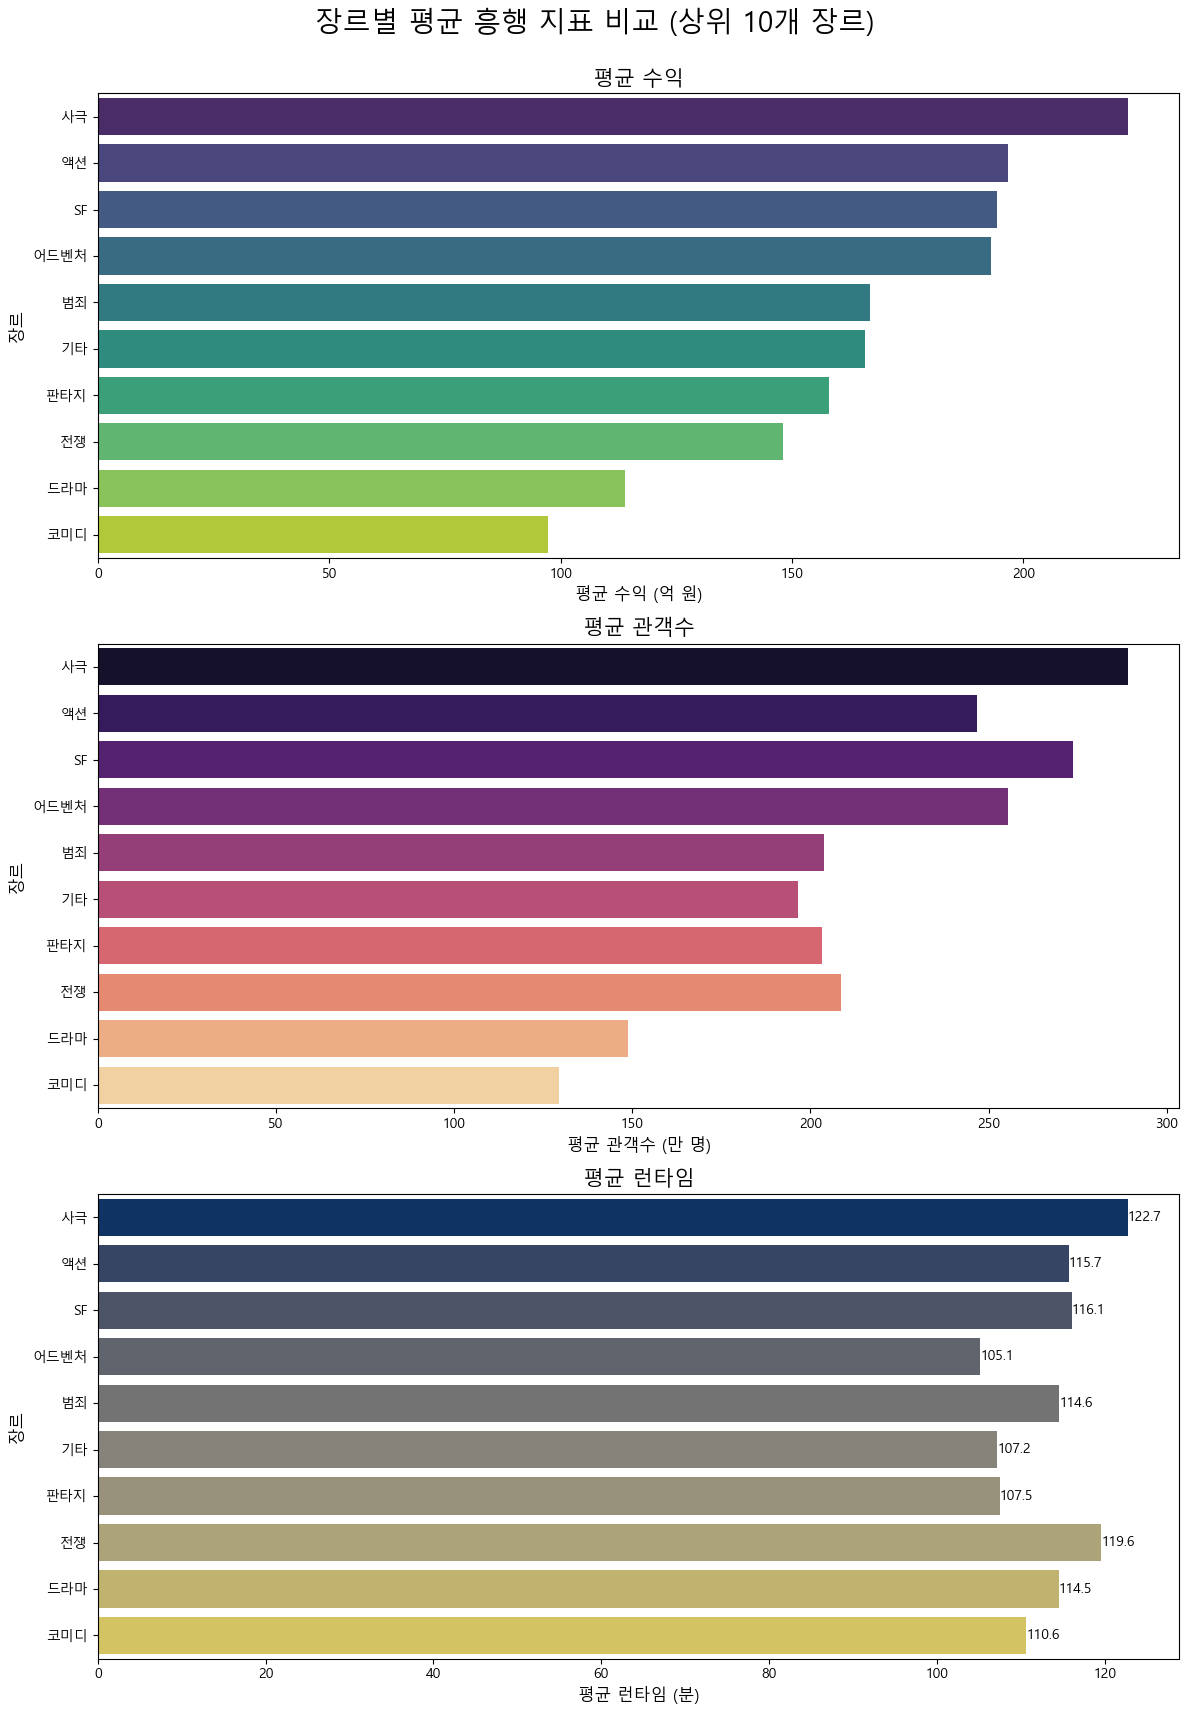


--- Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏòÅÌôîÏùò Í∞úÎ¥â Í≥ÑÏ†à Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ---


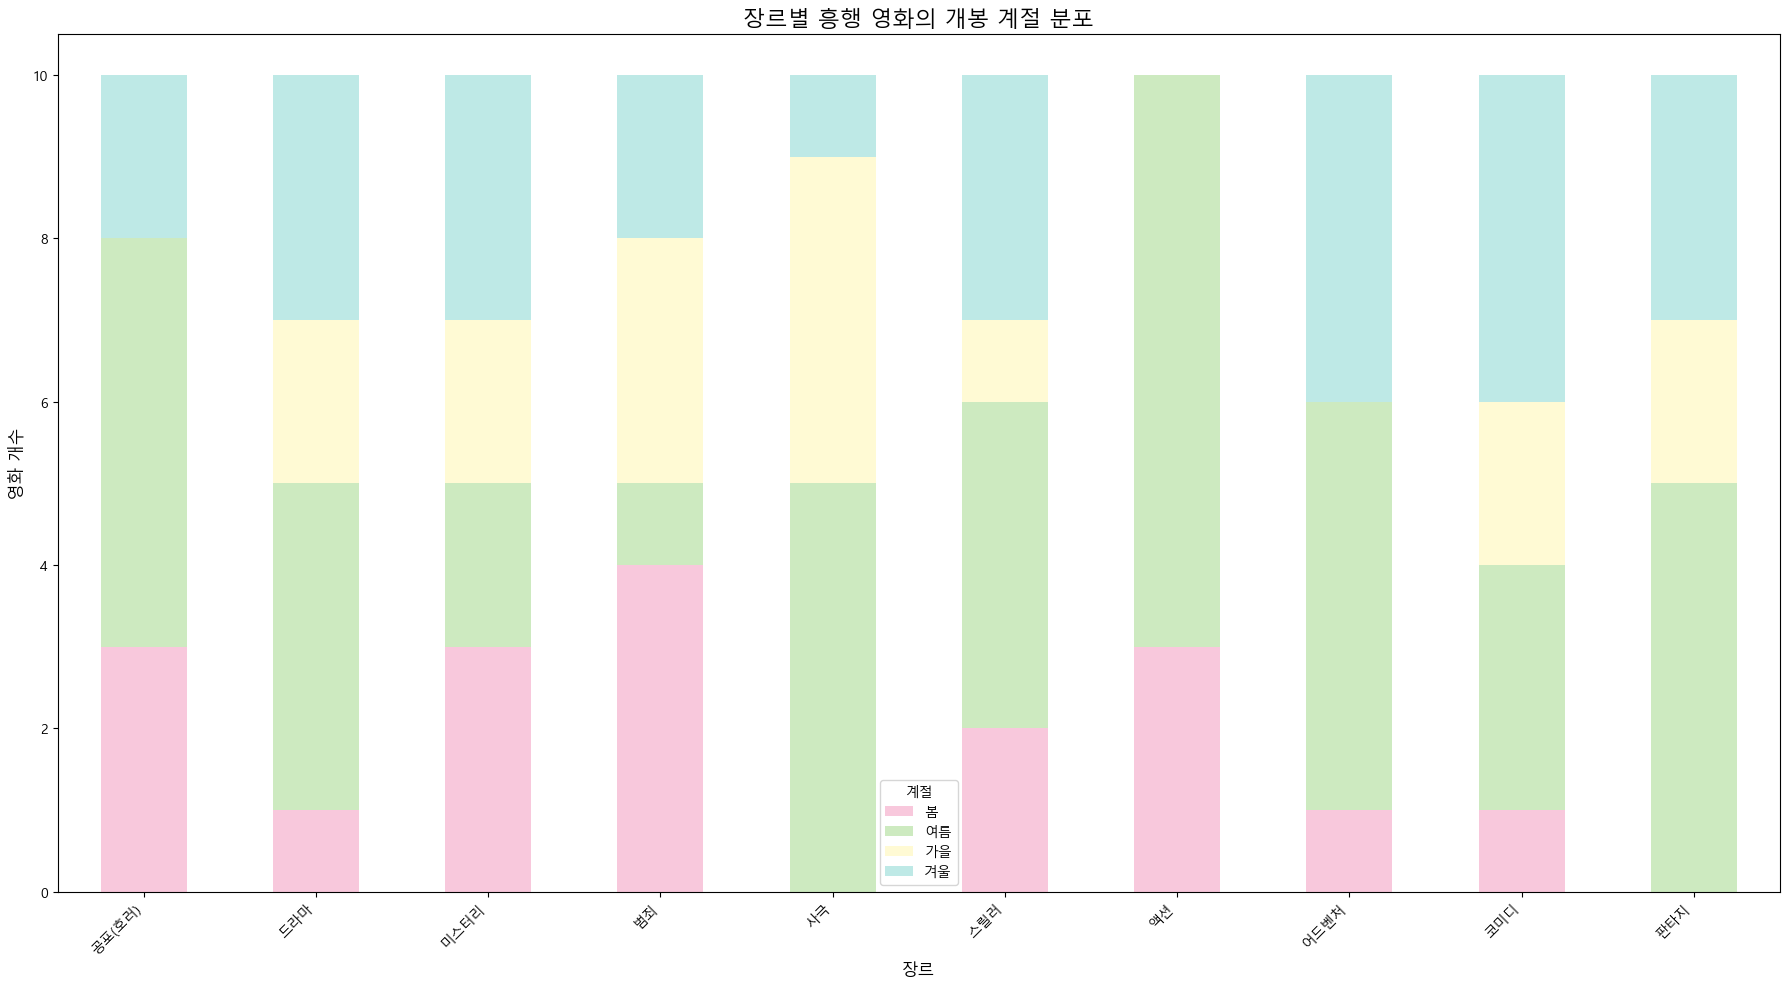


--- Ìù•Ìñâ ÏòÅÌôî Ïû•Î•¥ Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨ ---


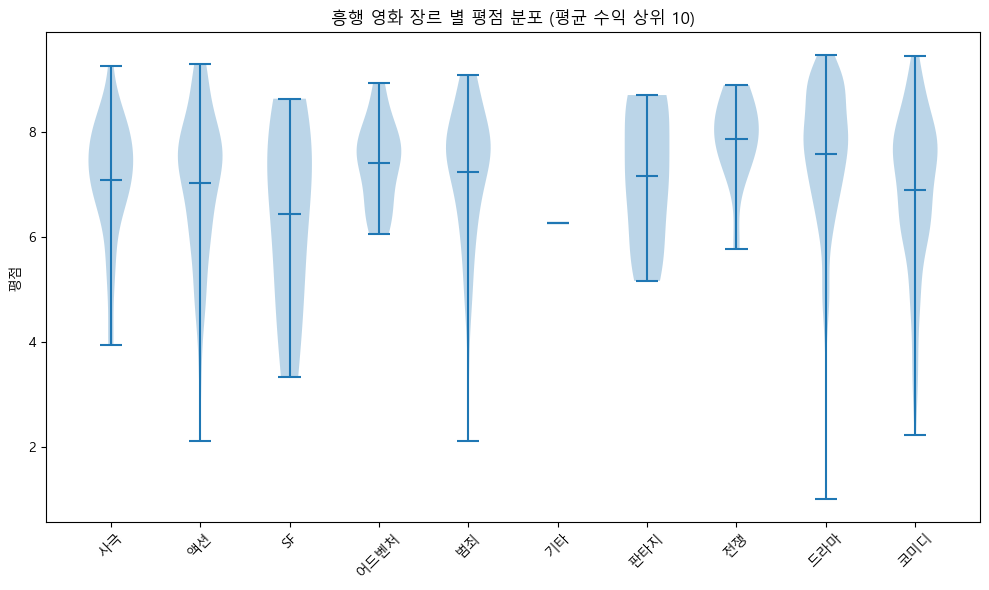

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú ÏÑ§Ï†ï Î∞è Ìè∞Ìä∏ ÏÑ§Ï†ï
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ÌååÏùº Í≤ΩÎ°ú (Ï≤´ Î≤àÏß∏ ÏΩîÎìú Î∏îÎ°ùÏùò Í≤ΩÎ°ú ÏÇ¨Ïö©)
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# ======================================================
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# ======================================================
try:
    df = pd.read_csv(PATH_EXP)

    # Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò ÌõÑ explode
    # ast.literal_evalÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÎ©¥, df['genres'].str.split(', ')Î°ú Î≥ÄÍ≤Ω
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df_exploded = df.explode('genres')
    
    # 'release_date'Ïùò ÏõîÏùÑ Í∏∞Î∞òÏúºÎ°ú 'season' Ïª¨Îüº ÏÉùÏÑ±
    df_exploded['season'] = pd.to_datetime(df_exploded['release_date']).dt.month.apply(lambda month: 'Î¥Ñ' if month in [3, 4, 5] else 'Ïó¨Î¶Ñ' if month in [6, 7, 8] else 'Í∞ÄÏùÑ' if month in [9, 10, 11] else 'Í≤®Ïö∏')
    
    # Ïû•Î•¥Í∞Ä ÏóÜÎäî Ìñâ Ï†úÍ±∞
    df_exploded.dropna(subset=['genres'], inplace=True)

    # ======================================================
    # 1. Ïû•Î•¥Î≥Ñ Í∞úÎ¥â Ìé∏Ïàò ÌååÏù¥ Ï∞®Ìä∏ (‚òÖ'Í∏∞ÌÉÄ' Ìï≠Î™© Ìè¨Ìï®)
    # ======================================================
    print("\n--- Ïû•Î•¥Î≥Ñ Í∞úÎ¥â Ìé∏Ïàò ÌååÏù¥ Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî ---")

    genre_counts = (df_exploded.groupby("genres")["movie_id"]
                    .nunique()
                    .sort_values(ascending=False))
    
    under_10 = genre_counts[genre_counts <= 10]
    over_10 = genre_counts[genre_counts > 10]

    other_count = under_10.sum()
    final_counts = pd.concat([over_10, pd.Series([other_count], index=['Í∏∞ÌÉÄ'])])
    final_counts = final_counts.sort_values(ascending=False)

    plt.figure(figsize=(10, 10))
    plt.pie(
        final_counts.values,
        labels=final_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor="white"),
        textprops={'fontsize': 7}
    )
    plt.title("2005‚Äì2025 Ïû•Î•¥Î≥Ñ Í∞úÎ¥â Ìé∏Ïàò ÎπÑÏú®", fontsize=16)
    plt.tight_layout()
    plt.show()

    # ======================================================
    # 2. Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏßÄÌëú ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
    # ======================================================
    print("\n--- Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏßÄÌëú ÏãúÍ∞ÅÌôî ---")

    # üö® df_explodedÎ•º ÏÇ¨Ïö©Ìï¥ Í∞úÎ≥Ñ Ïû•Î•¥Ïùò Ìù•Ìñâ ÏßÄÌëú Í≥ÑÏÇ∞
    success_factors = df_exploded.groupby('genres').agg(
        average_revenue=('revenue', 'mean'),
        average_audience=('audience_total', 'mean'),
        average_runtime=('runtime', 'mean'),
        movie_count=('title', 'count')
    ).reset_index()

    success_factors = success_factors[success_factors['movie_count'] >= 5]
    top_10_by_revenue = success_factors.sort_values(by='average_revenue', ascending=False).head(10)

    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)
    fig.suptitle('Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏßÄÌëú ÎπÑÍµê (ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥)', fontsize=20, y=0.95)

    sns.barplot(x='average_revenue', y='genres', data=top_10_by_revenue, ax=axes[0], palette='viridis', hue='genres', legend=False)
    axes[0].set_title('ÌèâÍ∑† ÏàòÏùµ', fontsize=15)
    axes[0].set_xlabel('ÌèâÍ∑† ÏàòÏùµ (Ïñµ Ïõê)', fontsize=12)
    axes[0].set_ylabel('Ïû•Î•¥', fontsize=12)
    axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/100000000:,.0f}'))

    sns.barplot(x='average_audience', y='genres', data=top_10_by_revenue, ax=axes[1], palette='magma', hue='genres', legend=False)
    axes[1].set_title('ÌèâÍ∑† Í¥ÄÍ∞ùÏàò', fontsize=15)
    axes[1].set_xlabel('ÌèâÍ∑† Í¥ÄÍ∞ùÏàò (Îßå Î™Ö)', fontsize=12)
    axes[1].set_ylabel('Ïû•Î•¥', fontsize=12)
    axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/10000:,.0f}'))

    sns.barplot(x='average_runtime', y='genres', data=top_10_by_revenue, ax=axes[2], palette='cividis', hue='genres', legend=False)
    axes[2].set_title('ÌèâÍ∑† Îü∞ÌÉÄÏûÑ', fontsize=15)
    axes[2].set_xlabel('ÌèâÍ∑† Îü∞ÌÉÄÏûÑ (Î∂Ñ)', fontsize=12)
    axes[2].set_ylabel('Ïû•Î•¥', fontsize=12)
    for container in axes[2].containers:
        axes[2].bar_label(container, fmt='%.1f')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # ======================================================
    # 3. Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏòÅÌôîÏùò Í∞úÎ¥â Í≥ÑÏ†à Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    # ======================================================
    print("\n--- Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏòÅÌôîÏùò Í∞úÎ¥â Í≥ÑÏ†à Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ---")

    genre_counts_filtered = df_exploded['genres'].value_counts()
    valid_genres = genre_counts_filtered[genre_counts_filtered >= 5].index
    df_filtered_genres = df_exploded[df_exploded['genres'].isin(valid_genres)]

    top_movies_per_genre = df_filtered_genres.sort_values(by='revenue', ascending=False).groupby('genres').head(10).reset_index(drop=True)

    top_10_genres_with_movies = top_movies_per_genre['genres'].value_counts().nlargest(10).index
    final_df_season = top_movies_per_genre[top_movies_per_genre['genres'].isin(top_10_genres_with_movies)]

    genre_season_counts = final_df_season.groupby(['genres', 'season']).size().unstack(fill_value=0)
    genre_season_counts = genre_season_counts[['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏']]

    seasonal_colors = ['#F8C8DC', '#CDEAC0', '#FFFAD4', '#BEE9E6']

    genre_season_counts.plot(kind='bar', figsize=(18, 10), stacked=True, color=seasonal_colors)
    plt.title('Ïû•Î•¥Î≥Ñ Ìù•Ìñâ ÏòÅÌôîÏùò Í∞úÎ¥â Í≥ÑÏ†à Î∂ÑÌè¨', fontsize=16)
    plt.xlabel('Ïû•Î•¥', fontsize=12)
    plt.ylabel('ÏòÅÌôî Í∞úÏàò', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Í≥ÑÏ†à', fontsize=10)
    plt.tight_layout()
    plt.show()

    # ======================================================
    # 4. Ìù•Ìñâ ÏòÅÌôî Ïû•Î•¥Ïùò ÌèâÏ†ê Î∂ÑÌè¨ (Î∞îÏù¥Ïò¨Î¶∞)
    # ======================================================
    print("\n--- Ìù•Ìñâ ÏòÅÌôî Ïû•Î•¥ Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨ ---")
    
    hit_genres = top_10_by_revenue['genres'].tolist() 
    sel = hit_genres

    data = [df_exploded.loc[df_exploded["genres"]==g, "vote_average_naver"].dropna() for g in sel]
    plt.figure(figsize=(10,6))
    plt.violinplot(data, showmeans=True)
    plt.xticks(range(1, len(sel)+1), sel, rotation=45)
    plt.title("Ìù•Ìñâ ÏòÅÌôî Ïû•Î•¥ Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨ (ÌèâÍ∑† ÏàòÏùµ ÏÉÅÏúÑ 10)")
    plt.ylabel("ÌèâÏ†ê")
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\nÏò§Î•ò: '{PATH_EXP}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except KeyError as e:
    print(f"\nÏò§Î•ò: {e} Ïª¨ÎüºÏù¥ DataFrameÏóê ÏóÜÏäµÎãàÎã§. Ïª¨ÎüºÎ™ÖÏùÑ Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")